# Arbitrary Value Imputation

In [7]:
import pandas as pd
import os
os.getcwd()
os.chdir("C:\\Users\\EARABMO\\Desktop\\ERICSSON ITEMS\\DATA SCIENTIST\\PYTHON\\.ipynb_checkpoints")
df=pd.read_csv("train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
def impute_nan(df,variable):
    df[variable+"_Zero"]=df[variable].fillna(0)
    df[variable+"_hundread"]=df[variable].fillna(100)

In [9]:
impute_nan(df,"Age")

In [10]:
df.head(10)

,Survived,Age,Fare,Age_Zero,Age_hundread
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


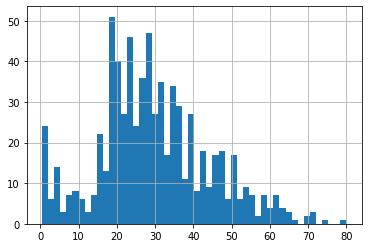

In [11]:
df.Age.hist(bins=50)

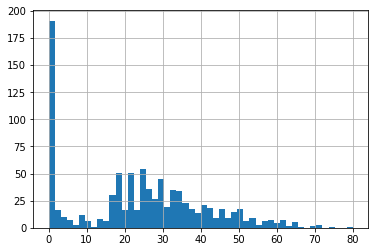

In [12]:
df.Age_Zero.hist(bins=50)

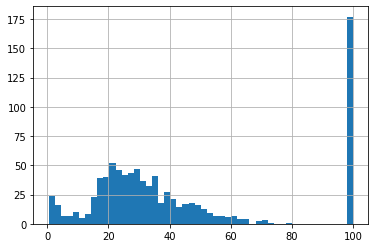

In [13]:
df.Age_hundread.hist(bins=50)

# Advantages


# Disadvantages

# How To Handle Categroical Missing Values

In [58]:
import pandas as pd
import os
os.chdir("C:\\Users\\EARABMO\\Desktop\\ERICSSON ITEMS\\DATA SCIENTIST\\PYTHON\\.ipynb_checkpoints")
#df=pd.read_csv('loan.csv',usecols=["id","member_id","url"])
df=pd.read_csv("train.csv")

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:
a=df.isnull().mean()*100

In [61]:
a.sort_values(ascending=True).head(50)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
Age            19.865320
Cabin          77.104377
dtype: float64

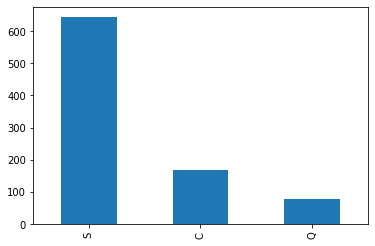

In [62]:
df['Embarked'].value_counts().plot.bar()

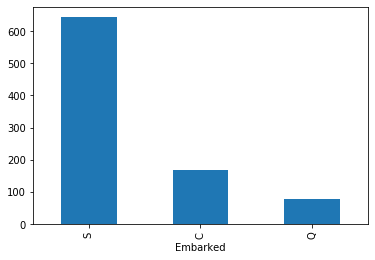

In [78]:
df.groupby(["Embarked"])["Embarked"].count().sort_values(ascending=False).plot.bar()

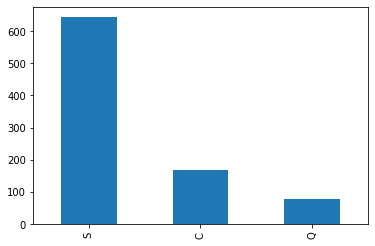

In [80]:
df["Embarked"].value_counts().plot.bar()

In [82]:
df["Embarked"].value_counts().index

Index(['S', 'C', 'Q'], dtype='object')

In [150]:
#Finding the null value details
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,NaN,None
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,NaN,None
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,NaN,None
5,6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,NaN,None
7,8,0,3,"Palsson, Master. Gosta Leonard",male,None,3,1,349909,21.0750,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,None,0,0,SOTON/OQ 392076,7.0500,NaN,None
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,None,0,5,382652,29.1250,NaN,None
886,887,0,2,"Montvila, Rev. Juozas",male,None,0,0,211536,13.0000,NaN,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1,2,W./C. 6607,23.4500,NaN,None


In [106]:
#finding the mode of the d
df["Embarked"].mode()[0]

'S'

In [151]:
#Replace the nan by mode value by the mode 
def impute_nan(df,variable):
    most_frequesnt_category=df[variable].mode()[0]
    df[variable].fillna(most_frequesnt_category,inplace=True)


In [152]:
df["Cabin"].mode()[0]

'B96 B98'

In [155]:
#Before replacing the null value (Total null value)
df.Cabin.isnull().sum()

687

In [159]:
#Applying the the feature to replace the null value
impute_nan(df,"Cabin")

In [160]:
#After applying the feature calculating the null value
df.Cabin.isnull().sum()

0

In [3]:
import pandas as pd
import numpy as np
import os
os.chdir("C:\\Users\\EARABMO\\Desktop\\ERICSSON ITEMS\\DATA SCIENTIST\\PYTHON\\.ipynb_checkpoints")
os.getcwd()

In [5]:
df=pd.read_csv("train.csv")

In [6]:
#Finding null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [10]:
for feature in ['Cabin','Age','Embarked']:
    impute_nan(df,feature)

In [11]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Cabinnewvar         0
Agenewvar           0
Embarkednewvar      0
dtype: int64

In [14]:
df.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [16]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabinnewvar,Agenewvar,Embarkednewvar
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Missing,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Missing,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Missing,35.0,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Missing,Missing,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E46,54.0,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Missing,2.0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Missing,27.0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Missing,14.0,C
